In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random

---
#### Gradient descent: *Multiple Minima vs Initial Guess*
---

##### $g(x) = x^4 - 4x^2 + 5$

In [2]:
# function cost
def g(x):
    return pow(x, 4) - 4*pow(x, 2) + 5
# derivative of g(x)
def dg(x):
    return 4*pow(x, 3) - 8*x

In [3]:
# generate data
x_1 = np.linspace(-2, 2, 1000)

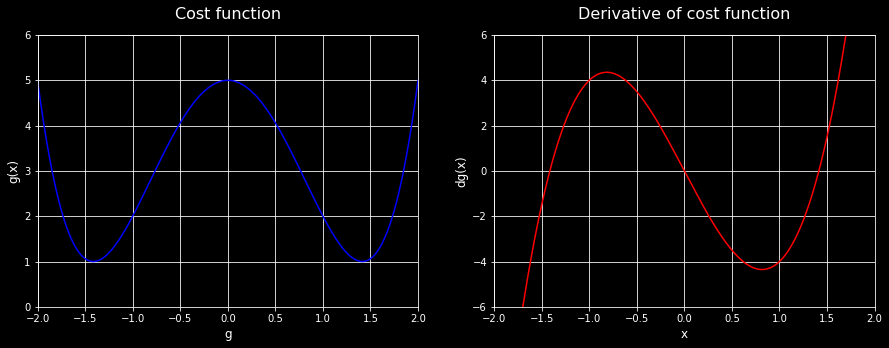

In [4]:
plt.style.use('dark_background')
plt.figure(figsize=[15, 5])

# cost function graph
cost = plt.subplot(1, 2, 1) #1row, 2cols, index=1
plt.title('Cost function', fontsize=16, pad=16)
plt.xlabel('g', fontsize=12)
plt.ylabel('g(x)', fontsize=12)
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.grid()
cost.plot(x_1, g(x_1), c='b')

# derivative graph
deriv = plt.subplot(1, 2, 2) #1row, 2cols, index=2
plt.title('Derivative of cost function', fontsize=16, pad=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('dg(x)', fontsize=12)
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.grid()
deriv.plot(x_1, dg(x_1), c='r')

plt.show()

---
##### *Gradient descent algorithm:*

In [5]:
def gradient_descent(deriv_func, init_guess, learn_rate=0.02, precision=0.0001, n_steps=1000):
    new_x = init_guess # random.uniform(-100, 100)
    # visualization variables
    x_list = [new_x]
    slope_list = [deriv_func(new_x)]
    
    for i in range(n_steps):
        prev_x = new_x # hold the value of previous iteration
        gradient = deriv_func(prev_x) # update the slope value
        new_x = prev_x - (learn_rate * gradient) # go one step further towards the minimun 
        
        #store data for visualization
        x_list.append(new_x)
        slope_list.append(deriv_func(new_x))
        
        # stop criteria
        x_variation = abs(new_x - prev_x) # check progress (step size)
        if x_variation < precision:
            break
    return new_x, x_list, slope_list

---
##### *Behaviour changes according to the init_guess value.*
##### *init_guess > 0, converges to the positive minimun;*
##### *init_guess < 0, converges to the negative minimun;*
##### *init_guess == 0, doesn't walk towards the minimun.*

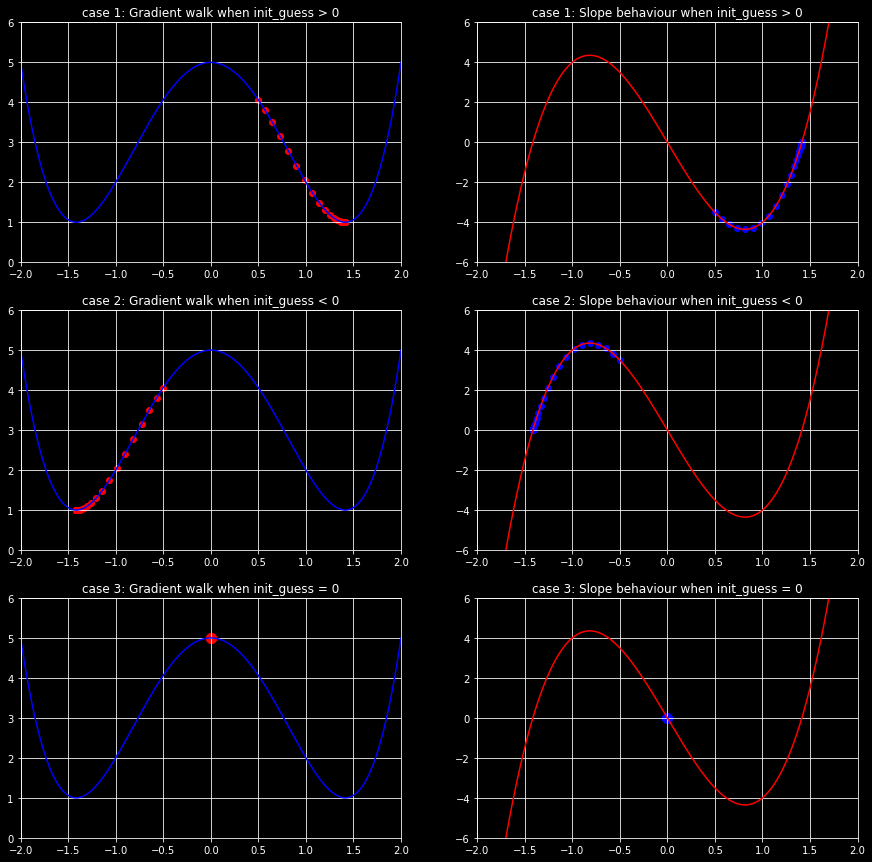

In [6]:
plt.figure(figsize=[15, 15])  

# case 1: init_guess > 0
new_x, x_list, deriv_list = gradient_descent(deriv_func=dg, init_guess= 0.5)
plt.subplot(3, 2, 1).set_title('case 1: Gradient walk when init_guess > 0') #3rows, 2cols, index=1
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.grid()
plt.scatter(x_list, g(np.array(x_list)), c='r')
plt.plot(x_1, g(x_1), c='b')
plt.subplot(3, 2, 2).set_title('case 1: Slope behaviour when init_guess > 0') #3rows, 2cols, index=2
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.grid()
plt.scatter(x_list, deriv_list, c='b')
plt.plot(x_1, dg(x_1), c='r')

# case 2: init_guess < 0
new_x, x_list, deriv_list = gradient_descent(deriv_func=dg, init_guess= -0.5)
plt.subplot(3, 2, 3).set_title('case 2: Gradient walk when init_guess < 0') #3rows, 2cols, index=3
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.grid()
plt.scatter(x_list, g(np.array(x_list)), c='r')
plt.plot(x_1, g(x_1), c='b')
plt.subplot(3, 2, 4).set_title('case 2: Slope behaviour when init_guess < 0') #3rows, 2cols, index=4
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.grid()
plt.scatter(x_list, deriv_list, c='b')
plt.plot(x_1, dg(x_1), c='r')

# case 3: init_guess = 0
new_x, x_list, deriv_list = gradient_descent(deriv_func=dg, init_guess=0)
plt.subplot(3, 2, 5).set_title('case 3: Gradient walk when init_guess = 0') #3rows, 2cols, index=5
plt.xlim(-2, 2)
plt.ylim(0, 6)
plt.grid()
plt.scatter(x_list, g(np.array(x_list)), c='r', s=100)
plt.plot(x_1, g(x_1), c='b')
plt.subplot(3, 2, 6).set_title('case 3: Slope behaviour when init_guess = 0') #3rows, 2cols, index=6
plt.xlim(-2, 2)
plt.ylim(-6, 6)
plt.grid()
plt.scatter(x_list, deriv_list, c='b', s=100)
plt.plot(x_1, dg(x_1), c='r')

plt.show()

##### *When function cost/objective has multiple global minima, the result may iteratively walk towards any of these points depending on the starting point (initial guess), it means, the result is heavily influenced by the starting point.*
##### *The path of the gradient is also sensitive to the initial guess in the case where the initial value for the slope is 0, even though it represents a maximun in the objective funcion.*
---